In [1]:
import networkx as nx
import anywidget
from pathlib import Path
from traitlets import List


G = nx.icosahedral_graph()
node_positions = nx.spring_layout(G, dim=3)
node_positions

{0: array([0.99845281, 0.28732577, 0.23893552]),
 1: array([ 0.38947178, -0.35241659,  0.92923094]),
 2: array([-0.68844461, -0.06046512,  0.81277785]),
 3: array([-1.        , -0.28678244, -0.24306841]),
 4: array([-0.11738214, -0.72330679, -0.77560095]),
 5: array([ 0.73811737, -0.76203605, -0.05406764]),
 7: array([ 0.30302307,  0.97560351, -0.30003445]),
 8: array([0.11425444, 0.72039956, 0.77647699]),
 9: array([-0.74043475,  0.75928048,  0.05669457]),
 10: array([-0.38859182,  0.35715299, -0.93231425]),
 11: array([ 0.69203135,  0.05979135, -0.81023579]),
 6: array([-0.3004975 , -0.97454667,  0.30120563])}

In [2]:
edges = list(G.edges)
edges

[(0, 1),
 (0, 5),
 (0, 7),
 (0, 8),
 (0, 11),
 (1, 2),
 (1, 5),
 (1, 6),
 (1, 8),
 (2, 3),
 (2, 6),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 6),
 (3, 9),
 (3, 10),
 (4, 5),
 (4, 6),
 (4, 10),
 (4, 11),
 (5, 6),
 (5, 11),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (8, 9),
 (9, 10),
 (10, 11)]

In [5]:
node_positions = {
    0: [-0.81, -0.48, 0.38],
    1: [0.13, -0.97, 0.27],
    2: [0.91, -0.24, 0.40],
    3: [0.81, 0.48, -0.38],
    4: [-0.02, 0.20, -1.00],
    5: [-0.44, -0.70, -0.59],
    7: [-0.62, 0.55, 0.58],
    8: [0.01, -0.20, 1.00],
    9: [0.44, 0.70, 0.59],
    10: [-0.13, 0.97, -0.27],
    11: [-0.91, 0.24, -0.40],
    6: [0.63, -0.55, -0.59],
}

edges = [
    (0, 1),
    (0, 5),
    (0, 7),
    (0, 8),
    (0, 11),
    (1, 2),
    (1, 5),
    (1, 6),
    (1, 8),
    (2, 3),
    (2, 6),
    (2, 8),
    (2, 9),
    (3, 4),
    (3, 6),
    (3, 9),
    (3, 10),
    (4, 5),
    (4, 6),
    (4, 10),
    (4, 11),
    (5, 6),
    (5, 11),
    (7, 8),
    (7, 9),
    (7, 10),
    (7, 11),
    (8, 9),
    (9, 10),
    (10, 11),
]

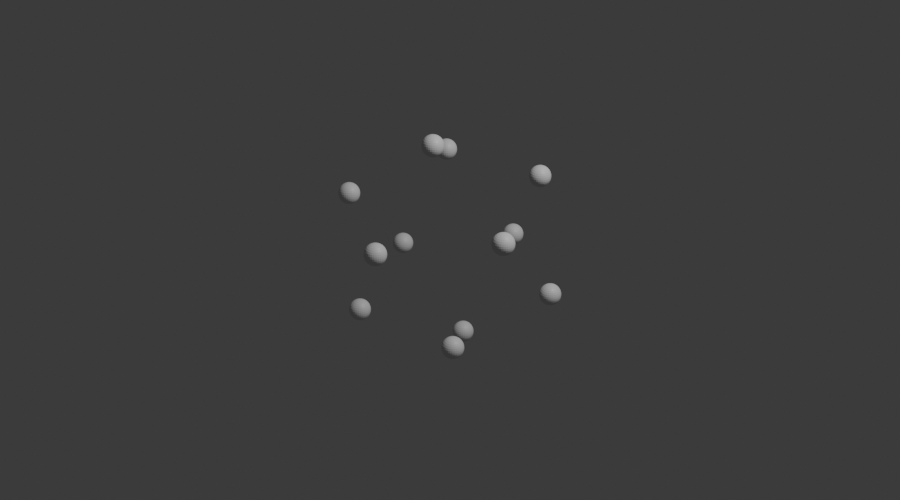

In [9]:
import bpy
import numpy as np

# Select all objects except the camera and light
for obj in bpy.data.objects:
    if obj.type not in {'CAMERA', 'LIGHT'}:
        obj.select_set(True)
bpy.ops.object.delete()

# Create spheres at the points
for key, coords in node_positions.items():
    bpy.ops.mesh.primitive_uv_sphere_add(location=(coords[0], coords[1], coords[2]), radius=0.1)
    sphere = bpy.context.object
    sphere.name = f"point{key}"

path = "/tmp/test.png"
bpy.context.scene.render.filepath = path
bpy.ops.render.render(write_still=True)

bpy.context.scene.render.resolution_x = 900
bpy.context.scene.render.resolution_y = 500

from IPython.display import display, Image
display(Image(filename=path))

In [8]:
import sys
import os

sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')